<a href="https://colab.research.google.com/github/Vaishnavi-Hegde17/Deep_Learning-and-Gen_AI-Lab/blob/main/Week_7_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis using RNN, LSTM, Bi-directional LSTM, and GRU

This notebook implements sentiment analysis on the IMDB movie reviews dataset using different types of recurrent neural networks.

We use:
- Embedding layer
- Simple RNN
- LSTM
- Bidirectional LSTM
- GRU


In [ ]:
# Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Bidirectional, Dense

In [ ]:
# Load and preprocess dataset
vocab_size = 10000
maxlen = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Function to compile and train model
def compile_and_train(model, name):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(f"Training {name}...")
    model.fit(X_train, y_train, epochs=3, batch_size=128, validation_data=(X_test, y_test))
    print(f"Evaluating {name}...")
    loss, acc = model.evaluate(X_test, y_test)
    print(f"{name} Accuracy: {acc:.4f}")

## RNN Model

In [ ]:
rnn_model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])
compile_and_train(rnn_model, "RNN")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training RNN...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6652 - loss: 0.5878 - val_accuracy: 0.8225 - val_loss: 0.4071
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8721 - loss: 0.3179 - val_accuracy: 0.8428 - val_loss: 0.4148
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9405 - loss: 0.1741 - val_accuracy: 0.7914 - val_loss: 0.4822
Evaluating RNN...
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7901 - loss: 0.4849
RNN Accuracy: 0.7914


## LSTM Model

In [ ]:
lstm_model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
compile_and_train(lstm_model, "LSTM")

Training LSTM...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7002 - loss: 0.5568 - val_accuracy: 0.8614 - val_loss: 0.3362
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8966 - loss: 0.2568 - val_accuracy: 0.8482 - val_loss: 0.3642
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9297 - loss: 0.1900 - val_accuracy: 0.8694 - val_loss: 0.3229
Evaluating LSTM...
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8691 - loss: 0.3267
LSTM Accuracy: 0.8694


## Bi-directional LSTM Model

In [ ]:
bilstm_model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])
compile_and_train(bilstm_model, "Bi-directional LSTM")

Training Bi-directional LSTM...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.7054 - loss: 0.5390 - val_accuracy: 0.8661 - val_loss: 0.3181
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9017 - loss: 0.2525 - val_accuracy: 0.8740 - val_loss: 0.3097
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9343 - loss: 0.1798 - val_accuracy: 0.8618 - val_loss: 0.3697
Evaluating Bi-directional LSTM...
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8632 - loss: 0.3680
Bi-directional LSTM Accuracy: 0.8618


## GRU Model

In [ ]:
gru_model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    GRU(64),
    Dense(1, activation='sigmoid')
])
compile_and_train(gru_model, "GRU")

Training GRU...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.6713 - loss: 0.5661 - val_accuracy: 0.8568 - val_loss: 0.3379
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8961 - loss: 0.2594 - val_accuracy: 0.8528 - val_loss: 0.3445
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9247 - loss: 0.1957 - val_accuracy: 0.8690 - val_loss: 0.3365
Evaluating GRU...
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8718 - loss: 0.3377
GRU Accuracy: 0.8690


**Plots for training/validation accuracy and loss with ROC**

Training RNN...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.5933 - loss: 0.6424 - val_accuracy: 0.8326 - val_loss: 0.3837
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8742 - loss: 0.3092 - val_accuracy: 0.8127 - val_loss: 0.4103
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9203 - loss: 0.2081 - val_accuracy: 0.7612 - val_loss: 0.5355


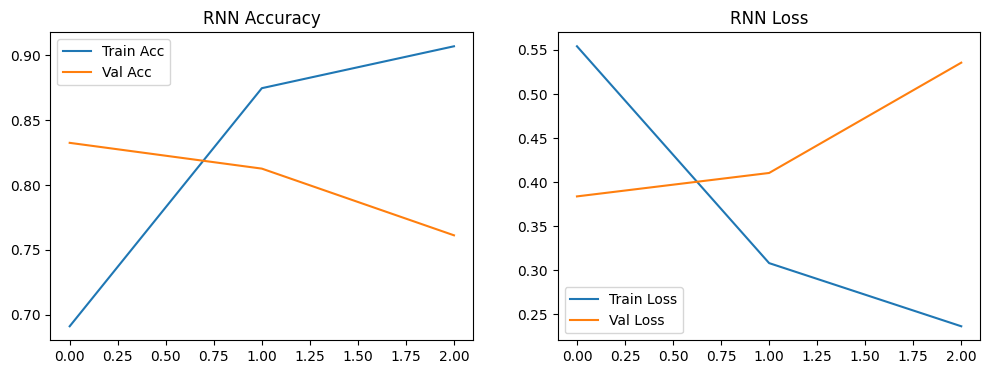

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7557 - loss: 0.5470
RNN Test Accuracy: 0.7612
Training LSTM...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7120 - loss: 0.5360 - val_accuracy: 0.8579 - val_loss: 0.3304
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9028 - loss: 0.2533 - val_accuracy: 0.8682 - val_loss: 0.3084
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9364 - loss: 0.1777 - val_accuracy: 0.8696 - val_loss: 0.3381


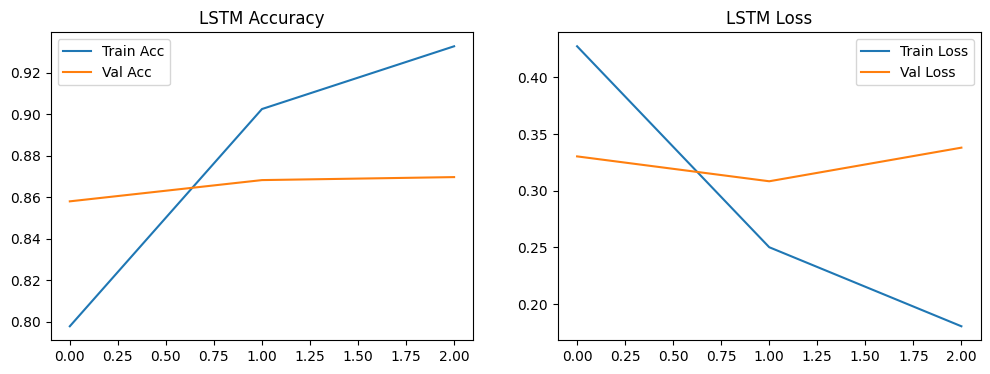

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8703 - loss: 0.3387
LSTM Test Accuracy: 0.8696
Training BiLSTM...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.6850 - loss: 0.5562 - val_accuracy: 0.8548 - val_loss: 0.3454
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.8915 - loss: 0.2795 - val_accuracy: 0.8643 - val_loss: 0.3258
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9223 - loss: 0.2021 - val_accuracy: 0.8321 - val_loss: 0.3862


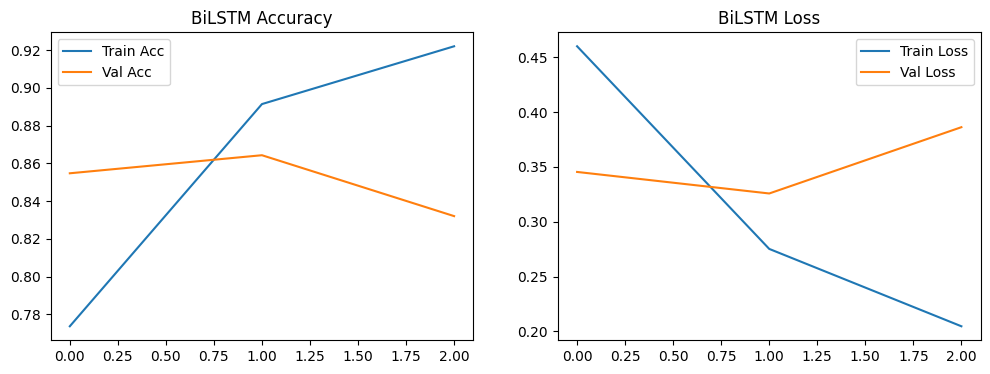

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8286 - loss: 0.3954
BiLSTM Test Accuracy: 0.8321
Training GRU...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6722 - loss: 0.5765 - val_accuracy: 0.8397 - val_loss: 0.3724
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8878 - loss: 0.2798 - val_accuracy: 0.8620 - val_loss: 0.3273
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9310 - loss: 0.1848 - val_accuracy: 0.8675 - val_loss: 0.3198


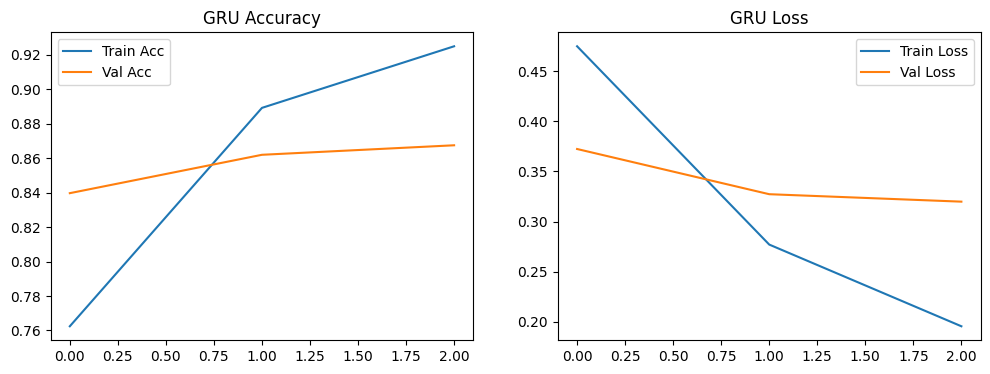

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8675 - loss: 0.3232
GRU Test Accuracy: 0.8675


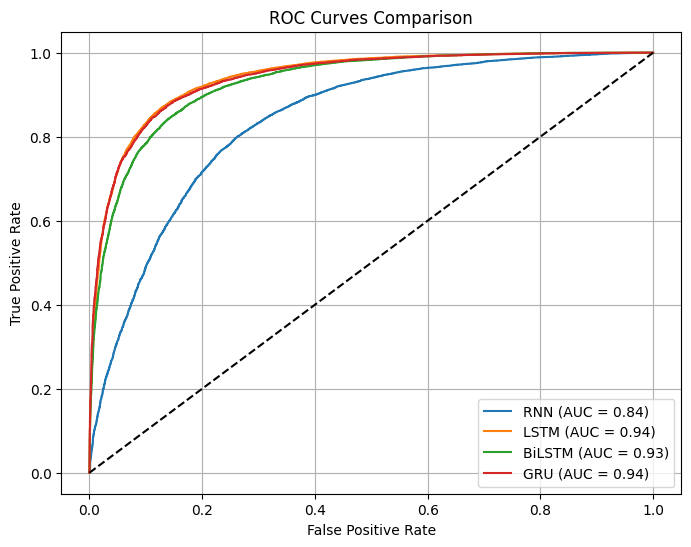

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Bidirectional, Dense

# Load and preprocess IMDB dataset
vocab_size = 10000
maxlen = 200
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Function to compile, train, evaluate with plots and ROC
def compile_train_roc(model, name, model_preds):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(f"Training {name}...")
    history = model.fit(X_train, y_train, epochs=3, batch_size=128, validation_data=(X_test, y_test))

    # Accuracy and Loss plots
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{name} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{name} Loss')
    plt.legend()
    plt.show()

    # Predictions and ROC
    y_pred_prob = model.predict(X_test)
    model_preds[name] = y_pred_prob
    loss, acc = model.evaluate(X_test, y_test)
    print(f"{name} Test Accuracy: {acc:.4f}")

# Train all models and collect predictions
model_predictions = {}

# RNN
rnn = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])
compile_train_roc(rnn, "RNN", model_predictions)

# LSTM
lstm = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
compile_train_roc(lstm, "LSTM", model_predictions)

# Bi-directional LSTM
bilstm = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])
compile_train_roc(bilstm, "BiLSTM", model_predictions)

# GRU
gru = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    GRU(64),
    Dense(1, activation='sigmoid')
])
compile_train_roc(gru, "GRU", model_predictions)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, y_pred in model_predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()
